<h1>Cheminformatics Project on antidepressant SSRIs </h1>



<h3>Importing libraries </h3>

In [1]:
import pandas as pd
import numpy as np

<h3> Install  PYMAL </h3>

In [8]:
!pip install --ignore-installed PyYAML

  Using cached PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)


<h3>Install pyHamcrest </h3>

In [13]:
!pip install PyHamcrest

<h3> Install chembl web resource client </h3>

In [2]:
!pip install chembl_webresource_client

<h3>import chembl web resource client </h3>

In [3]:
from chembl_webresource_client.new_client import new_client

<h3> Search for Target protein </h3>

<h3>Target search for SSRIs</h3>

In [6]:
target = new_client.target
search_duery = target.search('ssr')
search_duery
moleculeTargets = pd.DataFrame.from_dict(search_duery)
moleculeTargets




,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P32745', 'xref_name': None, 'xre...",Homo sapiens,Somatostatin receptor 3,14.0,False,CHEMBL2028,"[{'accession': 'P32745', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P30936', 'xref_name': None, 'xre...",Rattus norvegicus,Somatostatin receptor 3,14.0,False,CHEMBL3340,"[{'accession': 'P30936', 'component_descriptio...",SINGLE PROTEIN,10116
2,"[{'xref_id': 'NBK23691', 'xref_name': 'Somatos...",Mus musculus,Somatostatin receptor 3,13.0,False,CHEMBL2238,"[{'accession': 'P30935', 'component_descriptio...",SINGLE PROTEIN,10090
3,[],Homo sapiens,Translocon-associated protein subunit delta,13.0,False,CHEMBL4295777,"[{'accession': 'P51571', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Rattus norvegicus,Somatostatin receptor,7.0,False,CHEMBL2096977,"[{'accession': 'P30680', 'component_descriptio...",PROTEIN FAMILY,10116
5,[],Homo sapiens,Somatostatin receptor,7.0,False,CHEMBL2111436,"[{'accession': 'P35346', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Mus musculus,Somatostatin receptor,6.0,False,CHEMBL2111427,"[{'accession': 'P30935', 'component_descriptio...",PROTEIN FAMILY,10090


<h3>Select target from target_chembl_id</h3>

In [7]:
selectedTarget = moleculeTargets.target_chembl_id[0]
selectedTarget

'CHEMBL2028'

<h5>Retrieve the bioactivity data of the selected target </h5>

In [23]:
activity = new_client.activity
activities = activity.filter(target_chembl_id=selectedTarget).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(activities)
df.to_csv('molecules.csv')
df
# df.head(n=10)
# df.shape

# pd.set_option('display.max_columns', 45)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33929,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,13.0
1,None,43492,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,44718,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,447.0
3,None,47141,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,403.0
4,None,49831,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,None,18379656,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
735,None,18379657,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
736,None,18456676,[],CHEMBL4179567,Displacement of [125I]somatostatin-14 (Tyr11) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,360.0
737,None,18781762,[],CHEMBL4270250,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,119.0


In [24]:
df.standard_type.unique()

array(['IC50'], dtype=object)

<h5> Save bioactivity (IC50) to a csv file </h5>

In [25]:
df.to_csv('bioactivity_sr3_ic50.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'bioactivity_sr3_ic50.csv'

<h5> CHeck if there is any missing data in our dataset</h5>

In [28]:
dataframe2 = df[df.standard_value.notna()]
dataframe2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33929,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,13.0
1,None,43492,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,14.0
2,None,44718,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,447.0
3,None,47141,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,403.0
4,None,49831,[],CHEMBL807105,Binding affinity towards human Somatostatin re...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,None,18379656,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
735,None,18379657,[],CHEMBL4145427,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,uM,UO_0000065,None,20.0
736,None,18456676,[],CHEMBL4179567,Displacement of [125I]somatostatin-14 (Tyr11) ...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,360.0
737,None,18781762,[],CHEMBL4270250,Antagonist activity at human SSTR3 expressed i...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Somatostatin receptor 3,9606,None,None,IC50,nM,UO_0000065,None,119.0


In [29]:
bioactivity_list = []
for i in dataframe2.standard_value:
    if float(i) >= 10000:
        bioactivity_list.append("inactive")
    elif float(i) <= 1000:
            bioactivity_list.append("active")
    else:
            bioactivity_list.append("intermediate")
            bioactivity_list

In [34]:
dataframe2.molecule_chembl_id

0      CHEMBL1824055
1      CHEMBL2371100
2      CHEMBL3350907
3      CHEMBL2371070
4      CHEMBL3350888
           ...      
734    CHEMBL4165525
735    CHEMBL4176134
736    CHEMBL4217405
737    CHEMBL4288417
738    CHEMBL4282052
Name: molecule_chembl_id, Length: 734, dtype: object

In [40]:
mol_cid = []
for i in dataframe2.molecule_chembl_id:
    mol_cid.append(i)    

In [31]:
canonical_smiles = []
for i in dataframe2.canonical_smiles:
    canonical_smiles.append(i)

In [32]:
standard_value = []
for i in dataframe2.standard_value:
    standard_value.append(i)

In [33]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
dataFrame3 = dataframe2[selection]
dataFrame3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,750.0
...,...,...,...
734,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,20000.0
735,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,20000.0
736,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,360.0
737,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,119.0


In [24]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_list, standard_value))
# dataframe4 = pd.concat([dataFrame3, pd.Series(bioactivity_list)], axis=1)
dataframe4 = pd.DataFrame(data_tuples, columns=['mol_cid', 'canonical_smiles', 'bioactivity_list', 'standard_value'])
dataframe4

,mol_cid,canonical_smiles,bioactivity_list,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0
...,...,...,...,...
729,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,inactive,20000.0
730,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0
731,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0
732,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0


In [26]:
pd.concat([dataFrame3, pd.Series(bioactivity_list)], axis=1)

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,13.0,active
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,14.0,active
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,447.0,active
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,403.0,active
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,750.0,active
...,...,...,...,...
734,CHEMBL4165525,CC[C@H](C)[C@@H](OC(=O)CCc1ccccc1)C(=O)N1CCC[C...,20000.0,NaN
735,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,20000.0,NaN
736,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,360.0,NaN
737,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,119.0,NaN


In [27]:
dataFrame3.to_csv('bioactivity_preprocessed.csv', index=False)

<h3>Phase II of the computation begins here </h3>
<h4> Import rdkit library which is used for Chemical computation</h4>

In [48]:
import pandas as pd
newdf = pd.read_csv('bioactivity_preprocessed.csv') 
newdf

,mol_cid,canonical_smiles,bioactivity_list,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0
...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,10000.0


In [49]:
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### About Lipinski Descriptors
Christopher Lpinski descriptor is used to predict the ADME Pharmokinetic properties of molecules or the druglikeness of molecules. The lipinski rule can be used to determine the following chemical properties:
<li> Molecular weight < 500 Dalton </li>
<li> Octanol-water partition coefficient (LogP) < 5 </li>
<li> Hydrogen bond donors < 5 </li>
<li> Hydrogen bond acceptors < 10 </li>

<h4> write lipinski function which takes the smile argument. The smile arguement is used to calculate the chemical properties </h4>

In [50]:
#  code adapted from dataprofessor and https://codeocean.com/capsule/8848590/tree/v1

def generateDescriptors(smiles, verbose=False):

    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHAcceptors = Descriptors.NumHAcceptors(mol)
        desc_NumHDonors = Descriptors.NumHDonors(mol)
                
        row = np.array([desc_MolWt,desc_MolLogP,desc_NumHAcceptors,desc_NumHDonors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolWt","MolLogP","NumHAcceptors","NumHDonors"]   
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)
    
#     print("Total descriptors generated: 17 x "+str(len(smiles)))
    return descriptors

In [51]:
df_lipinski = generateDescriptors(newdf.canonical_smiles)
df_lipinski

,MolWt,MolLogP,NumHAcceptors,NumHDonors
0,1079.316,1.14880,13.0,12.0
1,1120.365,2.08730,14.0,12.0
2,1122.341,1.27170,14.0,12.0
3,1122.341,1.27170,14.0,12.0
4,1003.218,-0.07400,13.0,12.0
...,...,...,...,...
726,885.072,2.71470,10.0,2.0
727,668.692,5.74482,5.0,3.0
728,517.620,7.19890,4.0,1.0
729,660.661,6.64070,6.0,2.0


In [52]:
newdf


,mol_cid,canonical_smiles,bioactivity_list,standard_value
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0
...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,10000.0


<h5> Combine dataframe4 and generated lipinski descriptors dataframe </5>

In [53]:
dfCombined = pd.concat([newdf, df_lipinski], axis = 1)
dfCombined

,mol_cid,canonical_smiles,bioactivity_list,standard_value,MolWt,MolLogP,NumHAcceptors,NumHDonors
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,13.0,1079.316,1.14880,13.0,12.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,14.0,1120.365,2.08730,14.0,12.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,447.0,1122.341,1.27170,14.0,12.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,403.0,1122.341,1.27170,14.0,12.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,750.0,1003.218,-0.07400,13.0,12.0
...,...,...,...,...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,20000.0,885.072,2.71470,10.0,2.0
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,360.0,668.692,5.74482,5.0,3.0
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,119.0,517.620,7.19890,4.0,1.0
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,10000.0,660.661,6.64070,6.0,2.0


<h5> Convert IC50 to pIC50 </h5>
IC50 is the concentration of the molecule at 50%
pIC50 = log10(IC50). This is done because IC50 is unevenly distributed Steps to convert are
<ol>
<li>Multiply IC50 in the standard_value column by 10-9 to convert it from nanoMolar to Molar </li>
<li> multiply by -log10 </li>
<li> drop the standard_value column and add a new pIC50 column </li>
</ol>

In [54]:
# adapted from https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_ROS.ipynb

def convert_to_pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
#         convert from nM to M
        molar = i*(10**-9) 
        pIC50.append(-np.log10(molar))
    
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x

In [55]:
dfCombined.standard_value.describe()

count      731.000000
mean       745.652257
std       2161.052842
min          0.150000
25%         13.000000
50%        180.000000
75%       1000.000000
max      20000.000000
Name: standard_value, dtype: float64

In [56]:
-np.log10((10**-9) * 100000000)


1.0

In [57]:
-np.log10((10**-9) * 10000000000)

-1.0

In [58]:
def norm_value(input):
    norm = []
    
    for i in input ['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)
            
    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
    return x

In [59]:
df_norm = norm_value(dfCombined)
df_norm

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,standard_value_norm
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.14880,13.0,12.0,13.0
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.08730,14.0,12.0,14.0
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.27170,14.0,12.0,447.0
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.27170,14.0,12.0,403.0
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.07400,13.0,12.0,750.0
...,...,...,...,...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,885.072,2.71470,10.0,2.0,20000.0
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,668.692,5.74482,5.0,3.0,360.0
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,517.620,7.19890,4.0,1.0,119.0
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,660.661,6.64070,6.0,2.0,10000.0


In [60]:
df_final = convert_to_pIC50(df_norm)
df_final

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.14880,13.0,12.0,7.886057
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.08730,14.0,12.0,7.853872
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.27170,14.0,12.0,6.349692
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.27170,14.0,12.0,6.394695
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.07400,13.0,12.0,6.124939
...,...,...,...,...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,885.072,2.71470,10.0,2.0,4.698970
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,668.692,5.74482,5.0,3.0,6.443697
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,517.620,7.19890,4.0,1.0,6.924453
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,660.661,6.64070,6.0,2.0,5.000000


In [61]:
df_final.to_csv('bioactivity_stage_3.csv')
df_final.pIC50.describe()

count    731.000000
mean       7.006819
std        1.080535
min        4.698970
25%        6.000000
50%        6.744727
75%        7.886057
max        9.823909
Name: pIC50, dtype: float64

<h4> Remove the intermediate biactivity class </h4>

In [62]:
df_rem_int_class = df_final[df_final.bioactivity_list != 'intermediate']
df_rem_int_class 

,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.14880,13.0,12.0,7.886057
1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.08730,14.0,12.0,7.853872
2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.27170,14.0,12.0,6.349692
3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.27170,14.0,12.0,6.394695
4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.07400,13.0,12.0,6.124939
...,...,...,...,...,...,...,...,...
726,CHEMBL4176134,CC[C@H](C)[C@@H](OC(=O)C#Cc1ccccc1)C(=O)N1CCC[...,inactive,885.072,2.71470,10.0,2.0,4.698970
727,CHEMBL4217405,Cc1cc(F)ccc1N1CCN(C(=O)N[C@@H](C(=O)Nc2cc(CN(C...,active,668.692,5.74482,5.0,3.0,6.443697
728,CHEMBL4288417,CCOc1cc(CN2CCC(c3ncc(-c4ccc(F)cc4)[nH]3)CC2)cc...,active,517.620,7.19890,4.0,1.0,6.924453
729,CHEMBL4282052,CCOc1cc(CN2CCC3(CC2)CC(=O)N(c2ccc(C(=O)O)cc2)C...,inactive,660.661,6.64070,6.0,2.0,5.000000


<h3> Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descritors </h3>

In [63]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')




<h3> Frequency plot of the two bioactivity classes (active and inactive) </h3>


C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


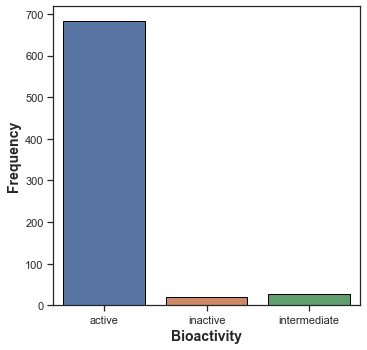

In [64]:
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x='bioactivity_list', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity', fontsize=14, fontWeight='bold')
plt.ylabel('Frequency', fontSize=14, fontWeight='bold')
plt.savefig('plot_bioactivity.pdf')


<h3> Scatter plot of MW vs LogP </h3>

C:\Users\Ephphatha\Anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = ax.scatter(scout_x, scout_y, **kws)
C:\Users\Ephphatha\Anaconda3\lib\site-packages\seaborn\relational.py:651: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  points = ax.scatter(*args, **kws)
C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


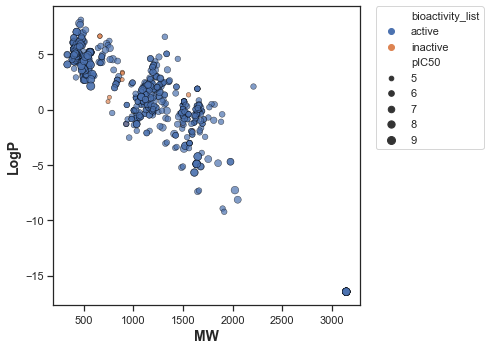

In [65]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWt', y='MolLogP', data=df_rem_int_class,hue='bioactivity_list', size='pIC50', edgeColor='black', alpha=0.7)
plt.xlabel('MW', fontsize=14, fontWeight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_W_vs_LogP.pdf') 

### Box plots

#### pIC50 value

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


PermissionError: [Errno 13] Permission denied: 'plot_IC50.pdf'

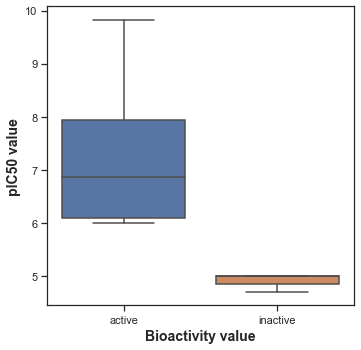

In [66]:
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_list', y = 'pIC50', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_IC50.pdf')

### Apply Mann-Whitney U Test to check the difference between the activa and inactive class

In [67]:
def mannWhitney(descriptor, verbose=False):
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python
    from numpy.random import seed
    from numpy.random import randn
    from scipy.stats import mannwhitneyu
    
# seed the random number generator
    seed(1)

# actives and inactives
    selection = [descriptor, 'bioactivity_list'] 
    df = df_rem_int_class[selection]
    active = df[df.bioactivity_list == 'active']
    active = active[descriptor]
    
    selection = [descriptor, 'bioactivity_list'] 
    df = df_rem_int_class[selection]
    inactive = df[df.bioactivity_list == 'inactive']
    inactive = inactive[descriptor]
    
#     compare samples
    stat, p = mannwhitneyu(active, inactive)
# print('statistics%.3f, p=%.3f' %(stat, p))
# interpret
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    results = pd.DataFrame({'Descriptor':descriptor, 'Statistics':stat, 'P':p,
                          'alpha':alpha, 'Interpretation':interpretation}, index=[0])
    filename = 'manwhitneyu_' + descriptor + '.csv'
    results.to_csv(filename)
    return results

### pIC50

In [68]:
mannWhitney ('pIC50')

,Descriptor,Statistics,P,alpha,Interpretation
0,pIC50,0.0,3.738291e-14,0.05,Different distribution (reject H0)


### MolWt

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


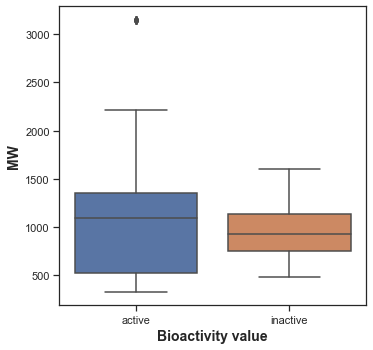

In [69]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'MolWt', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [70]:
mannWhitney('MolWt')

,Descriptor,Statistics,P,alpha,Interpretation
0,MolWt,6384.0,0.448288,0.05,Same distribution (fail to reject H0)


### LogP

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


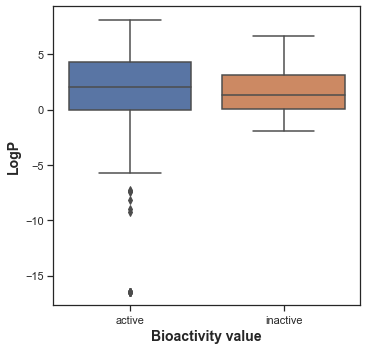

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'MolLogP', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [72]:
mannWhitney('MolLogP')

,Descriptor,Statistics,P,alpha,Interpretation
0,MolLogP,5876.0,0.238296,0.05,Same distribution (fail to reject H0)


### Number of Hydrogen Donors

C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


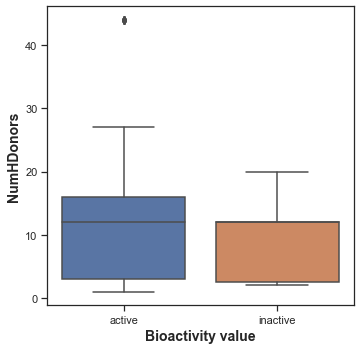

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'NumHDonors', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_num_hydrogen_donors.pdf')

In [74]:
mannWhitney('NumHDonors')

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHDonors,5092.0,0.051615,0.05,Same distribution (fail to reject H0)


C:\Users\Ephphatha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


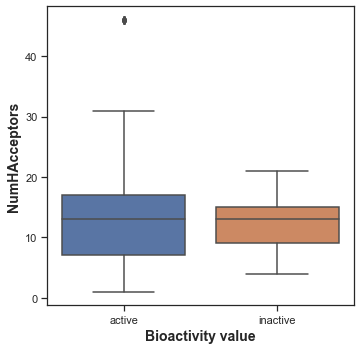

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_list', y = 'NumHAcceptors', data = df_rem_int_class)
plt.xlabel('Bioactivity value', fontsize=14, fontWeight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_num_hydrogen_acceptors.pdf')

In [76]:
mannWhitney('NumHAcceptors')

,Descriptor,Statistics,P,alpha,Interpretation
0,NumHAcceptors,6480.0,0.491988,0.05,Same distribution (fail to reject H0)


## Interpretation of Statistical Results

### Box plots
#### pIC50

## PHASE III

### Install PADEL descriptor


In [2]:
import pandas as pd
!pip install padelpy


In [16]:
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip --no-check-certificate
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh --no-check-certificate

--2021-11-13 21:24:17--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-11-13 21:24:18--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip.2'

     0K .......... .......... .......... .......... ..........  0% 9.31K 44m57s
    50K 

  6050K .......... .......... .......... .......... .......... 24%  468K 4m44s
  6100K .......... .......... .......... .......... .......... 24% 99.9K 4m43s
  6150K .......... .......... .......... .......... .......... 24%  160K 4m41s
  6200K .......... .......... .......... .......... .......... 24% 91.2K 4m39s
  6250K .......... .......... .......... .......... .......... 25% 46.9K 4m39s
  6300K .......... .......... .......... .......... .......... 25% 91.6K 4m38s
  6350K .......... .......... .......... .......... .......... 25% 21.0M 4m35s
  6400K .......... .......... .......... .......... .......... 25% 29.9M 4m32s
  6450K .......... .......... .......... .......... .......... 25% 35.2M 4m30s
  6500K .......... .......... .......... .......... .......... 26% 28.4M 4m27s
  6550K .......... .......... .......... .......... .......... 26% 20.3M 4m24s
  6600K .......... .......... .......... .......... .......... 26% 39.0M 4m21s
  6650K .......... .......... .......... .......... 

--2021-11-13 21:26:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2021-11-13 21:26:39--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: 'padel.sh.2'

     0K                                                       100%  450K=0.001s

2021-11-13 21:26:40 (450 KB

In [ ]:
! unzip padel.zip

### Load bioactivity data

In [3]:
stage3DataFrame = pd.read_csv('bioactivity_stage_3.csv')
stage3DataFrame.head()

,Unnamed: 0,mol_cid,canonical_smiles,bioactivity_list,MolWt,MolLogP,NumHAcceptors,NumHDonors,pIC50
0,0,CHEMBL1824055,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1079.316,1.1488,13.0,12.0,7.886057
1,1,CHEMBL2371100,C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2cc...,active,1120.365,2.0873,14.0,12.0,7.853872
2,2,CHEMBL3350907,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H...,active,1122.341,1.2717,14.0,12.0,6.349692
3,3,CHEMBL2371070,C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H]...,active,1122.341,1.2717,14.0,12.0,6.394695
4,4,CHEMBL3350888,C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)C...,active,1003.218,-0.0740,13.0,12.0,6.124939


In [4]:
selection = ['canonical_smiles', 'mol_cid']
sdf3_selection = stage3DataFrame[selection]
sdf3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [5]:
! cat molecule.msi | head -5

C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL1824055
C[C@@H](c1ccc2ccccc2c1)[C@H]1NC(=O)[C@H](Cc2ccc(O)cc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC1=O	CHEMBL2371100
C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@@H](Cc2c[nH]c3ccccc23)NC(=O)N(C)[C@@H](C(=O)c2ccccc2)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL3350907
C[C@@H](O)[C@@H]1NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC(=O)N(C)[C@@H](C(=O)c2ccccc2)NC(=O)[C@@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC1=O	CHEMBL2371070
C[C@@H]1NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@@H](N)CSSC[C@@H](C(=O)O)NC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](Cc2c[nH]c3ccccc23)NC1=O	CHEMBL3350888


cat: write error: No space left on device


In [6]:
! type molecule.smi | wc -l

731


### Calculate PADEL Descriptors

In [7]:
! bash padel.sh

Cannot create results file.


Nov 13, 2021 10:40:15 PM libpadeldescriptor.PaDELResultsFile Open
SEVERE: Cannot create results file
java.io.FileNotFoundException: descriptors_output.csv (The process cannot access the file because it is being used by another process)
	at java.io.FileOutputStream.open0(Native Method)
	at java.io.FileOutputStream.open(Unknown Source)
	at java.io.FileOutputStream.<init>(Unknown Source)
	at java.io.FileOutputStream.<init>(Unknown Source)
	at libpadeldescriptor.PaDELResultsFile.Open(Unknown Source)
	at libpadeldescriptor.libPaDELDescriptorMaster.Initialize(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.StartCmd(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.launchCommandLine(Unknown Source)
	at padeldescriptor.PaDELDescriptorApp.main(Unknown Source)



### Prepare the X and Y Data Matrix

### X Variable

In [ ]:
import pandas as pd

In [8]:

df3_x = pd.read_csv('descriptors_output.csv')
df3_x

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL2371070,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3350907,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1824055,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2371100,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL3350913,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,CHEMBL4217405,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
727,CHEMBL4288417,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
728,CHEMBL4176134,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
729,CHEMBL4282052,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df3_x = df3_x.drop(columns=['Name'])
df3_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
727,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
728,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
729,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Y Variable

### Convert IC50 to pIC50

In [10]:
df3_y = stage3DataFrame['pIC50']
df3_y

0      7.886057
1      7.853872
2      6.349692
3      6.394695
4      6.124939
         ...   
726    4.698970
727    6.443697
728    6.924453
729    5.000000
730    5.000000
Name: pIC50, Length: 731, dtype: float64

### Combining X and Y Variable

In [15]:
dfCombined3 = pd.concat([df3_x, df3_y], axis = 1)

In [16]:
dfCombined3.to_csv('bioactivity_stage3_pic50_final.csv', index=False)

In [17]:
df3_x.shape

(731, 881)

In [18]:
df3_y.shape


(731,)

### Remove low variance features

In [13]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 *(1 - .8)))
x = selection.fit_transform(df3_x)

In [14]:
x.shape

(731, 106)

### Split Data in the ratio 80:20

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df3_x, df3_y, test_size=0.2)
x_train.shape, y_train.shape

((584, 881), (584,))

In [21]:
x_test.shape, y_test.shape

((147, 881), (147,))

### Building a Regression Model Using Random Forest

In [22]:
import numpy as np
np.random.seed(100)
antidepressionModel = RandomForestRegressor(n_estimators=100)
antidepressionModel.fit(x_train, y_train)
r2 = antidepressionModel.score(x_test, y_test)
r2

0.4555252651189997

In [23]:
y_pred = antidepressionModel.predict(x_test)
y_pred

array([6.11277461, 6.19823532, 6.95734961, 6.06270336, 6.55749357,
       5.51395425, 7.02712519, 7.089377  , 7.3631101 , 7.41827731,
       5.13336835, 6.54762679, 8.09818073, 7.13589928, 6.69336436,
       6.82256981, 6.95734961, 7.5098694 , 7.41827731, 8.2874449 ,
       6.11277461, 8.67771157, 6.07309644, 7.41827731, 6.24797529,
       7.24697552, 7.97834811, 6.08553169, 8.67771157, 6.96280658,
       7.82052494, 6.54541444, 6.44152044, 5.73006713, 6.        ,
       6.60962152, 7.48102654, 6.82256981, 6.81187029, 7.22173875,
       6.17246399, 8.7331855 , 7.5919254 , 6.76885198, 6.38081366,
       6.69336436, 7.8463684 , 8.68125404, 6.96280658, 6.53455939,
       7.43898282, 6.10146493, 6.58454747, 6.93238314, 7.26646188,
       7.34920401, 6.24545898, 6.97448871, 6.27161911, 7.62069414,
       6.54525355, 6.06465473, 6.98622306, 6.59788525, 6.86321734,
       6.92181053, 6.        , 8.95708382, 6.38081366, 7.69613962,
       6.3139908 , 7.66101562, 6.81717888, 8.14254697, 6.82233

### Scatter Plot of Experimental Vs Predicted pIC50 Values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show



### Lazylist

In [ ]:
! pip install lazypredict

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor


In [ ]:
X = df3_x
Y = df3_y

### Data Pre-processing

In [ ]:
df3_x.shape

In [ ]:
# remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(df3_x)
X.shape


### Splitting Using 80/20 Ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, df3_y, test_size = 0.2)

### Compare ML Algorithmns

In [ ]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
train, test = clf.fit(x_train, x_test, y_train, y_test)


In [ ]:
train

In [ ]:
test

### Data Visualization of Model Performance

In [ ]:
# Bar plot of R-squared values

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize = (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 10))